In [26]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#import warnings filter
from warnings import simplefilter

#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [12]:
train=pd.read_csv(r'C:\Users\dhruv\Desktop\DataScience\pet adopt\train.csv')

In [13]:
train.head(100)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95,ANSL_70120,2014-06-24 00:00:00,2018-01-19 18:19:00,1.0,Tan,0.21,31.52,0,7,0.0,2
96,ANSL_71504,2016-07-04 00:00:00,2016-11-25 18:46:00,0.0,Blue Tabby,0.11,42.76,0,1,1.0,1
97,ANSL_71993,2012-07-21 00:00:00,2017-08-05 17:34:00,0.0,Chocolate,0.84,22.98,0,7,1.0,2
98,ANSL_69762,2013-12-27 00:00:00,2018-10-05 15:59:00,0.0,Black,0.09,8.86,0,1,1.0,1


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       18834 non-null  int32  
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 1.5+ MB


In [6]:
train.shape

(18834, 11)

In [21]:
train.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [20]:
train['condition'].value_counts()

0    7758
1    6819
2    4257
Name: condition, dtype: int64

In [18]:
train['condition']=train['condition'].fillna((train['condition'].mean()))

In [19]:
train['condition']=train['condition'].astype(int)

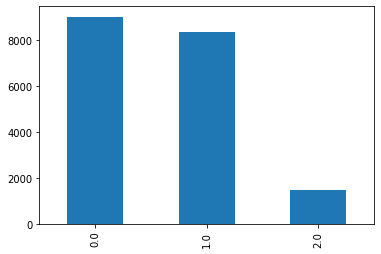

In [27]:
#To check if the train data is imbalanced
train['breed_category'].value_counts().plot(kind="bar")
plt.show()

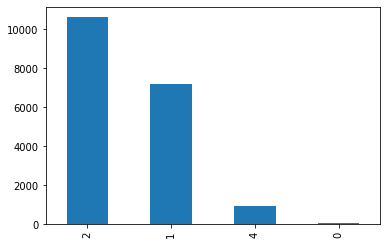

In [28]:
train['pet_category'].value_counts().plot(kind="bar")
plt.show()

In [29]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.814113,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.776801,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


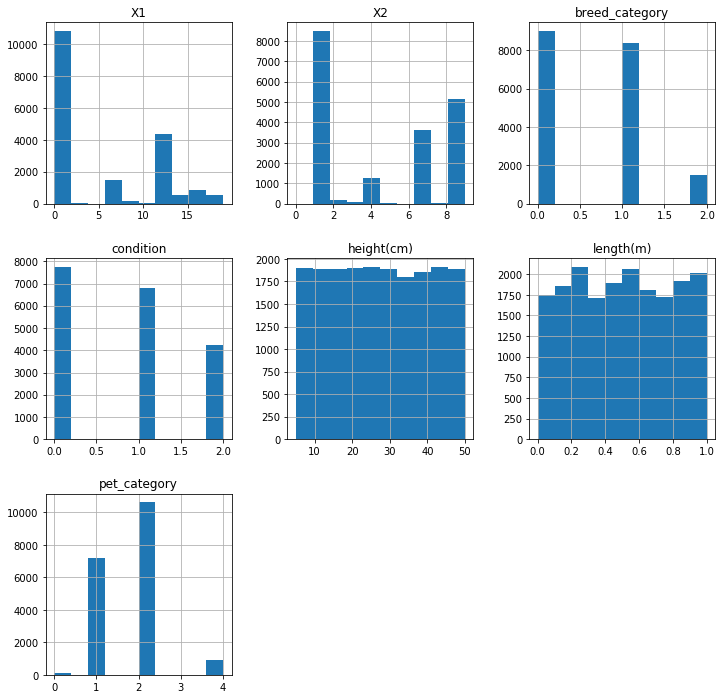

In [30]:
train.hist(figsize=(12,12))
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

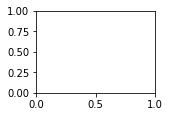

In [31]:
#Checking for outliers
plt.figure(figsize=(20,25))
for i, column in enumerate(list(train.columns)):
    plt.subplot(14,8, i+1)
    sns.boxplot(train[column])
    plt.grid()